In [3]:
from segment_anything import SamPredictor, sam_model_registry
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [4]:
sam = sam_model_registry["vit_h"](checkpoint="checkpoint/sam_vit_h.pth")

In [3]:
predictor =  SamPredictor(sam)

In [8]:
im = Image.open('img/cat_complex.jpg')

In [9]:
hwc = np.array(im)

In [6]:
predictor.set_image(hwc)

In [14]:
def show_anns(anns, axes=None):
    if len(anns) == 0:
        return
    if axes:
        ax = axes
    else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.5)))

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   

    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  

In [12]:
input_point = np.array([[1000,1500]])
input_label = np.array([1])

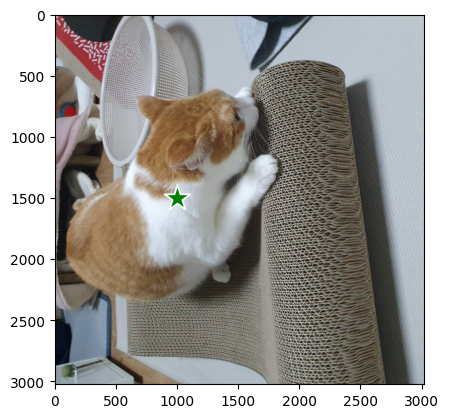

In [13]:
plt.imshow(hwc)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

In [14]:
masks, scores, logits = predictor.predict(
    point_coords = input_point,
    point_labels = input_label,
    multimask_output = True
)

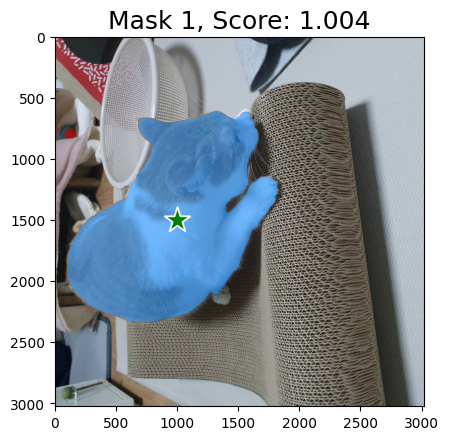

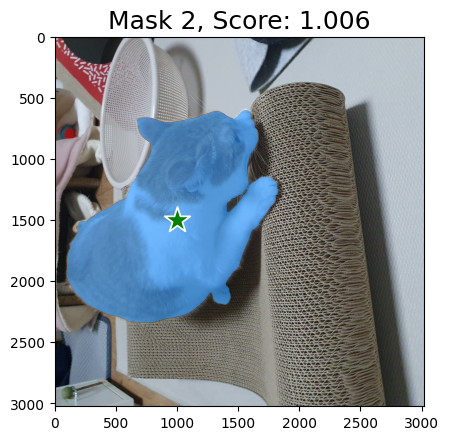

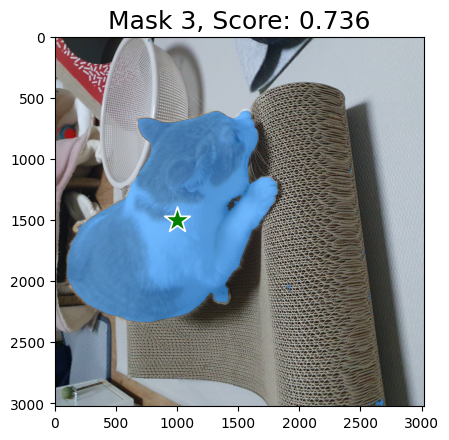

In [15]:
for i, (mask, score) in enumerate(zip(masks, scores)):
#     plt.figure(figsize=(10,10))
    plt.imshow(hwc)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.show()  

In [5]:
from segment_anything import SamAutomaticMaskGenerator

In [17]:
del(predictor)

In [10]:
mask_generator = SamAutomaticMaskGenerator(sam, points_per_batch=16)

In [11]:
masks = mask_generator.generate(hwc)

In [ ]:
_, axes = plt.subplots(1,3, figsize=(16,16))
axes[0].imshow(hwc)
show_anns(masks, axes[1])
axes[2].imshow(hwc)
show_anns(masks, axes[2])